**Importing the libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.datasets import mnist

SEED = 2017

Using TensorFlow backend.


**Loading the MNIST dataset:**

In [0]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

**Show an example of each label and print the count per label:**

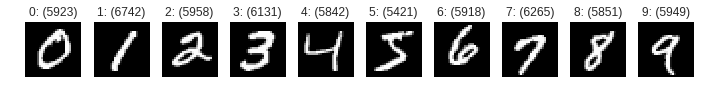

In [3]:
# Plot first image of each label

unique_labels = set(y_train)
plt.figure(figsize = (12, 12))

i = 1
for label in unique_labels:
  image = X_train[y_train.tolist().index(label)]
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
  i += 1
  _ = plt.imshow(image, cmap = 'gray')
plt.show()  

## Examples of labels (and count) in the MNIST dataset

**Preprocessing the data:**

In [0]:
# Normalize data
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.

# One-Hot-Encode labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

# Flatten data - we treat the image as a sequential array of values
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))

**Define the model with the sigmoid activation function:**

In [5]:
model_sigmoid = Sequential()

model_sigmoid.add(Dense(700, input_dim = 784, activation = 'sigmoid'))
model_sigmoid.add(Dense(700, activation = 'sigmoid'))
model_sigmoid.add(Dense(700, activation = 'sigmoid'))
model_sigmoid.add(Dense(700, activation = 'sigmoid'))
model_sigmoid.add(Dense(700, activation = 'sigmoid'))
model_sigmoid.add(Dense(350, activation = 'sigmoid'))
model_sigmoid.add(Dense(100, activation = 'sigmoid'))
model_sigmoid.add(Dense(10, activation = 'softmax'))

# Compile model with SGD
model_sigmoid.compile(loss = 'categorical_crossentropy',
                      optimizer = 'sgd', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


**Define the model with the ReLU activation function:**

In [0]:
model_relu = Sequential()

model_relu.add(Dense(700, input_dim = 784, activation = 'relu'))
model_relu.add(Dense(700, activation = 'relu'))
model_relu.add(Dense(700, activation = 'relu'))
model_relu.add(Dense(700, activation = 'relu'))
model_relu.add(Dense(700, activation = 'relu'))
model_relu.add(Dense(350, activation = 'relu'))
model_relu.add(Dense(100, activation = 'relu'))
model_relu.add(Dense(10, activation = 'softmax'))

# Compile model with SGD
model_relu.compile(loss = 'categorical_crossentropy',
                   optimizer = 'sgd', metrics = ['accuracy'])

**Create a callback function to store the loss values per batch:**

In [0]:
class history_loss(Callback):
  
  def on_train_begin(self, logs = {}):
    self.losses = []
    
  def on_batch_end(self, batch, logs = {}):
    batch_loss = logs.get('loss')
    self.losses.append(batch_loss)

**Running the models:**

In [8]:
n_epochs = 10
batch_size = 256
validation_split = 0.2

history_sigmoid = history_loss()
model_sigmoid.fit(X_train, y_train, epochs = n_epochs,
                  batch_size = batch_size,
                  callbacks = [history_sigmoid],
                  validation_split = validation_split,
                  verbose = 2)

history_relu = history_loss()
model_relu.fit(X_train, y_train, epochs = n_epochs,
               batch_size = batch_size,
               callbacks = [history_relu],
               validation_split = validation_split,
               verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 2.3235 - acc: 0.1089 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 2/10
 - 2s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 3/10
 - 2s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 4/10
 - 2s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 5/10
 - 2s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 6/10
 - 2s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 7/10
 - 2s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 8/10
 - 2s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3031 - val_acc: 0.1060
Epoch 9/10
 - 2s - loss: 2.3014 - acc: 0.1138 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 10/10
 - 2s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3026 - val_acc: 0.1060
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - lo

**Plot losses:**

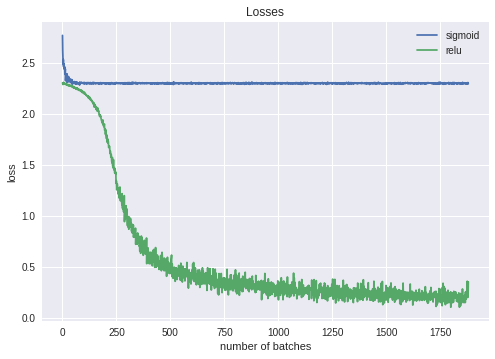

In [9]:
plt.plot(np.arange(len(history_sigmoid.losses)), 
         history_sigmoid.losses, label = 'sigmoid')
plt.plot(np.arange(len(history_relu.losses)),
         history_relu.losses, label = 'relu')
plt.title('Losses')
plt.xlabel('number of batches')
plt.ylabel('loss')
plt.legend(loc = 1)
plt.show()

## Losses for sigmoid and ReLU model

**Extract the maximum weights of each model per layer:**

In [0]:
w_sigmoid = []
w_relu = []

for i in range(len(model_sigmoid.layers)):
  w_sigmoid.append(max(model_sigmoid.layers[i].get_weights()[1]))
  w_relu.append(max(model_relu.layers[i].get_weights()[1]))

**Plot the weights of both models:**

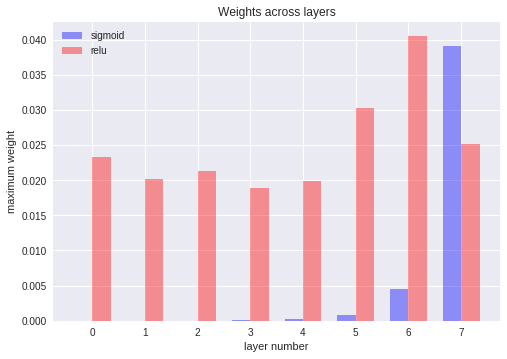

In [11]:
fig, ax = plt.subplots()

index = np.arange(len(model_sigmoid.layers))
bar_width = 0.35

plt.bar(index, w_sigmoid, bar_width, label = 'sigmoid', 
        color = 'b', alpha = 0.4)
plt.bar(index + bar_width, w_relu, bar_width, label = 'relu',
        color = 'r', alpha = 0.4)
plt.title('Weights across layers')
plt.xlabel('layer number')
plt.ylabel('maximum weight')
plt.legend(loc = 0)

plt.xticks(index + bar_width / 2, np.arange(8))
plt.show()

## Maximum weights across layers for sigmoid and ReLU activation
## functions